U.S. Crude Oil Production Data analysis and Predictions via Multilayer Perceptron Neural Network

Loading required libraries and packages:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Dataset Description:
This dataset provides detailed information about U.S. crude oil imports by month for every year from 2009 to 2024. The data includes the country of origin, the U.S. port of entry, the name of the oil company, the type of crude oil, and the volume imported (in thousands of barrels).

## **Attribute Information:-**
**Year:**	The year of the import.

**Month:**	The month of the import.

**OriginName:**	The name of the place where the crude oil was exported from.

**OriginTypeName:**	The type of location the crude oil was exported from (e.g. country, region, etc.).

**DestinationName:** The name of the place in the U.S. receiving the crude oil.

**DestinationTypeName:**	The type of destination (e.g., port, refinery).

**GradeName:**	The grade or type of crude oil imported (e.g., Light Sweet, Heavy Sour).

**Quantity:**	The volume of crude oil imported, measured in thousands of barrels.

In [ ]:
# Load dataset
df = pd.read_csv('/content/data[1].csv')

**Analysing the data:**

The dataset contains 483053 rows and 8 columns.

In [ ]:
df.shape

(483053, 8)

In [ ]:
df.head(5)

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
0,2009,1,Belize,Country,EXXONMOBIL REFINING & SPLY CO / BEAUMONT / TX,Refinery,Light Sour,61
1,2009,1,Belize,Country,FLINT HILLS RESOURCES LP / WEST / TX,Refinery,Light Sour,62
2,2009,1,Algeria,Country,SHELL OIL PRODUCTS US / ST ROSE / LA,Refinery,Light Sweet,10
3,2009,1,Algeria,Country,OIL TANKING PL INC / HOUSTON (GULF) / TX,Refinery,Light Sweet,381
4,2009,1,Algeria,Country,UNKNOWN PROCESSOR-TX / UNKNOWN PROCESSOR-TX / TX,Refinery,Light Sweet,851


In [ ]:
df.tail()

,year,month,originName,originTypeName,destinationName,destinationTypeName,gradeName,quantity
483048,2024,1,World,World,United States,United States,Heavy Sour,120942
483049,2024,1,World,World,United States,United States,Heavy Sweet,8859
483050,2024,1,World,World,United States,United States,Light Sour,7811
483051,2024,1,World,World,United States,United States,Light Sweet,12553
483052,2024,1,World,World,United States,United States,Medium,55237


Let's check the total number of null values present in each column of the dataframe

In [ ]:
df.isnull().sum()

year                   0
month                  0
originName             0
originTypeName         0
destinationName        0
destinationTypeName    0
gradeName              0
quantity               0
dtype: int64

In [ ]:
df.describe()

,year,month,quantity
count,483053.000000,483053.000000,483053.000000
mean,2015.388875,6.459825,2425.239876
std,4.295262,3.435325,6367.700629
min,2009.000000,1.000000,1.000000
25%,2012.000000,3.000000,359.000000
50%,2015.000000,6.000000,804.000000
75%,2019.000000,9.000000,2008.000000
max,2024.000000,12.000000,141016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483053 entries, 0 to 483052
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 483053 non-null  int64 
 1   month                483053 non-null  int64 
 2   originName           483053 non-null  object
 3   originTypeName       483053 non-null  object
 4   destinationName      483053 non-null  object
 5   destinationTypeName  483053 non-null  object
 6   gradeName            483053 non-null  object
 7   quantity             483053 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 29.5+ MB


Analyse Categorical Features:

In [ ]:
df['year'].value_counts()

year
2009    39619
2010    38285
2011    37925
2012    37716
2013    35531
2014    32739
2015    32600
2016    32246
2017    31720
2018    31478
2019    29282
2020    26162
2021    25851
2023    25034
2022    24793
2024     2072
Name: count, dtype: int64

In [ ]:
df['month'].value_counts()

month
1     42357
7     41684
6     41378
8     40980
5     40739
3     40274
4     39951
9     39921
10    39773
11    38887
12    38687
2     38422
Name: count, dtype: int64

In [ ]:
df['gradeName'].value_counts()

gradeName
Heavy Sour     160473
Medium         144192
Light Sweet     79695
Light Sour      51468
Heavy Sweet     47225
Name: count, dtype: int64

**Visualize the categorical features:**

Top 10 Origin Name:

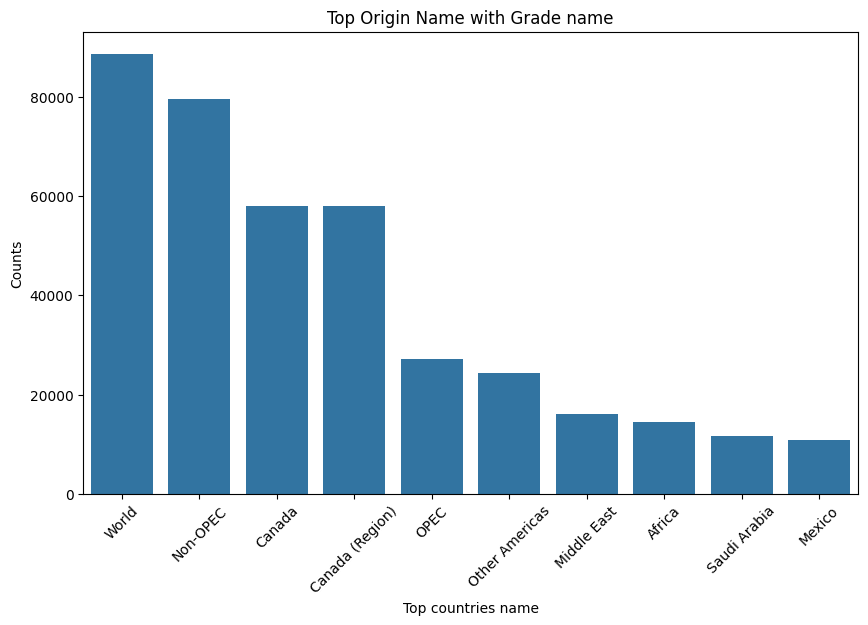

In [ ]:
plt.figure(figsize=(10,6))
top_origin_name = df['originName'].value_counts().head(10)
sns.barplot(x=top_origin_name.index, y=top_origin_name.values)
plt.title('Top Origin Name with Grade name')
plt.xlabel("Top countries name")
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Top Destination Type Names:

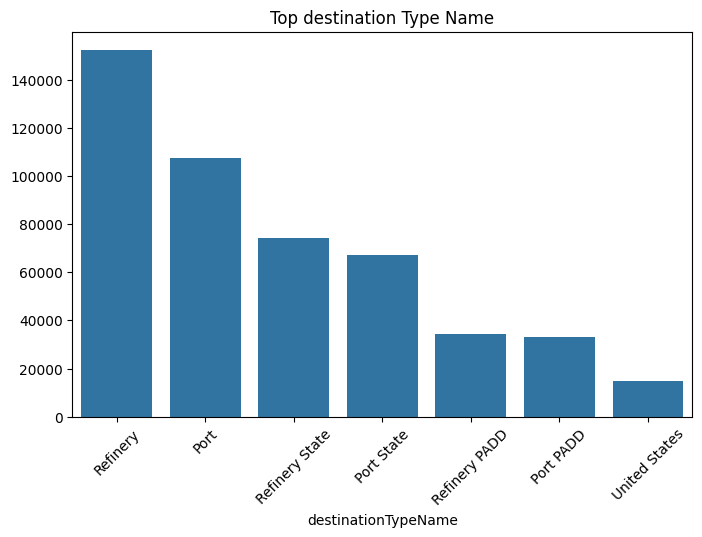

In [ ]:
fig = plt.figure(figsize=(8,5))
top_destination_type_name = df['destinationTypeName'].value_counts()
sns.barplot(x=top_destination_type_name.index, y=top_destination_type_name.values)
plt.title("Top destination Type Name")
plt.xticks(rotation=45)
plt.show()

**Analyse the features type either Numeric or Categorical:**

There are three numeric features and five categorical features in the dataframe. This code shows the type of values, each column contains.

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object' or len(df[col].unique()) < 10:
    print(f"Categorical: {col} ")
  else:
    print(f"Numerical: {col}")

Numerical: year
Numerical: month
Categorical: originName 
Categorical: originTypeName 
Categorical: destinationName 
Categorical: destinationTypeName 
Categorical: gradeName 
Numerical: quantity


### Analyse the Target variable: Quantity of Crude Oil Production:

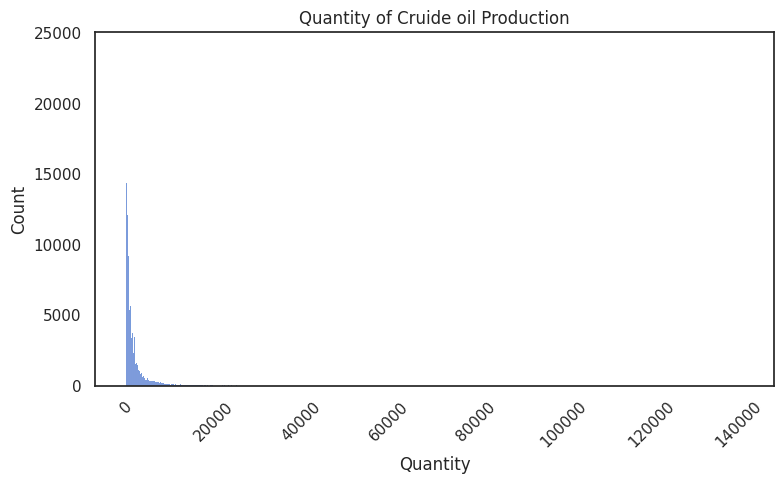

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.histplot(df['quantity'], kde=False)
plt.title("Quantity of Cruide oil Production")
plt.xlabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotting a histogram of the top 50 most common values in each column:


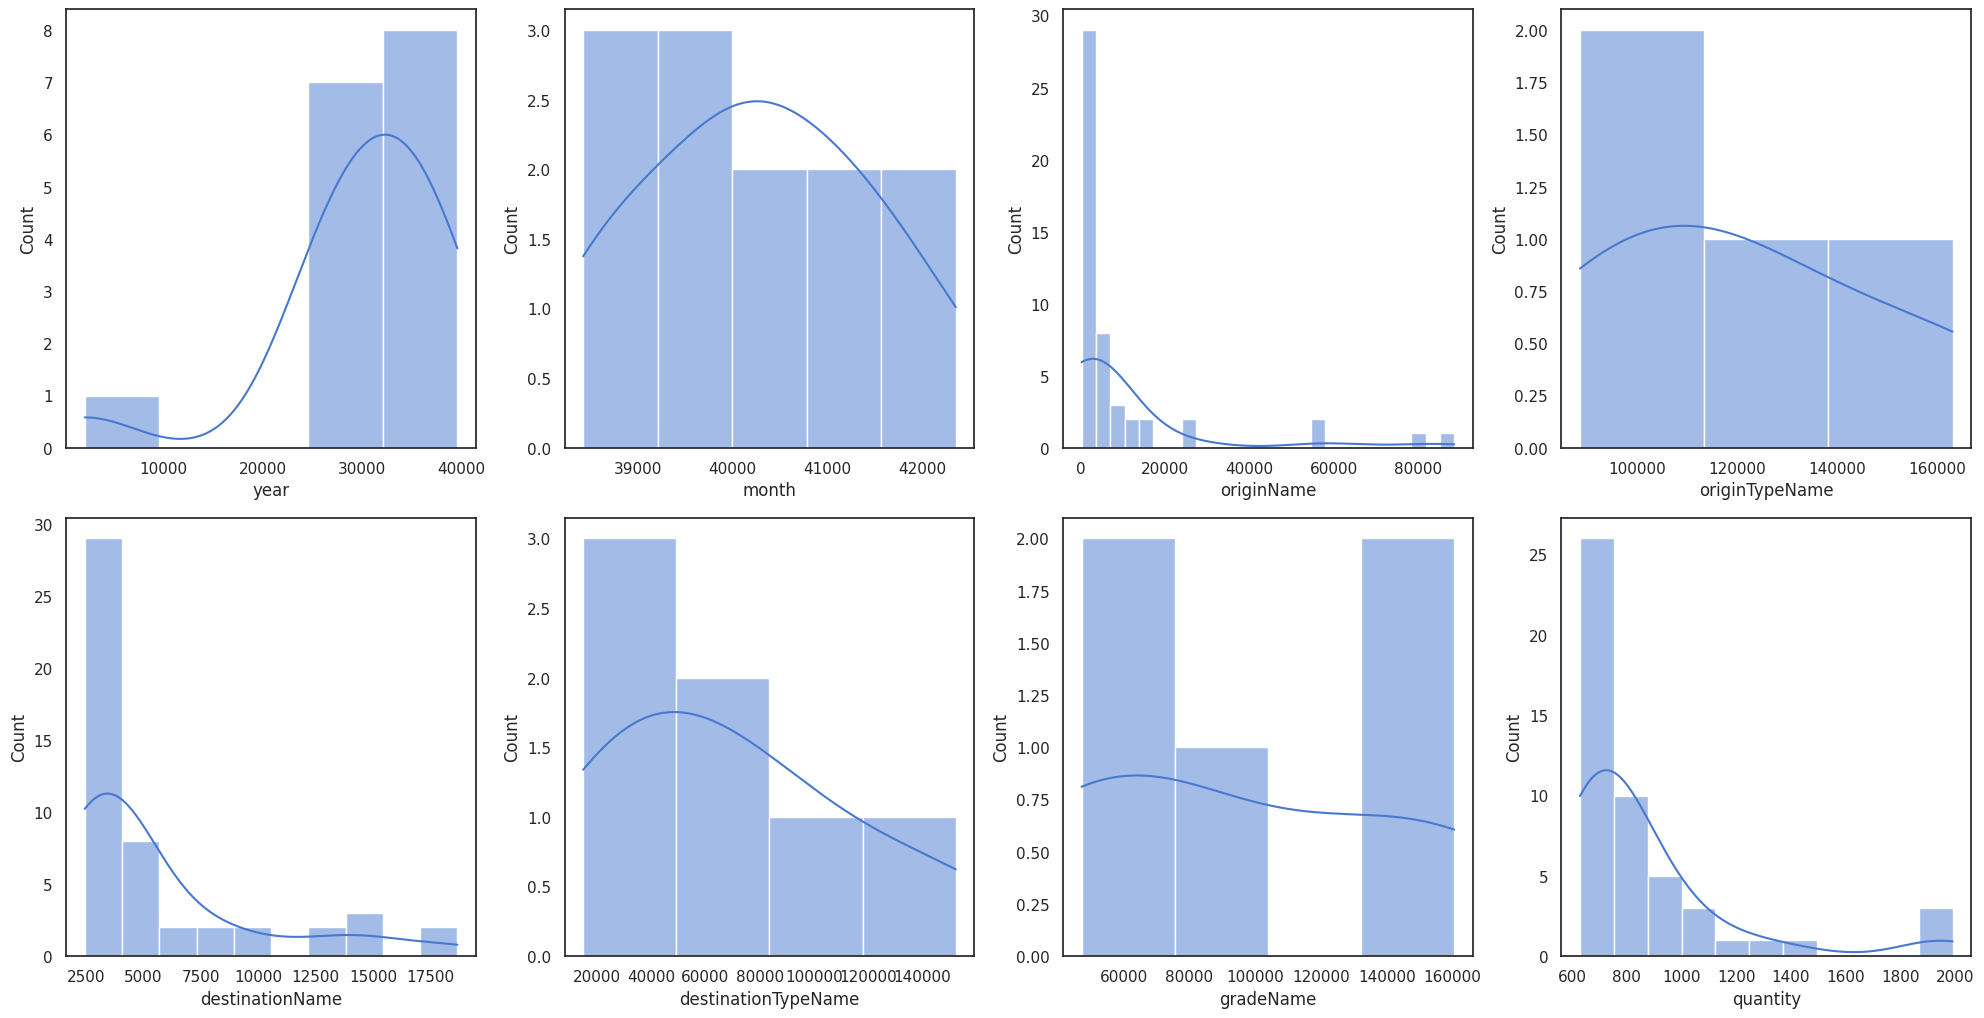

In [ ]:
# Set the seaborn style and color palette:
sns.set(style='white', palette='muted')

plt.figure(figsize=(20,20))

for i, col in enumerate(df.columns):
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col].value_counts().head(50), kde=True)
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

**Time Series Analysis:**

In [ ]:
# Time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# Set the date as the index of the dataframe
df.set_index('date', inplace=True)

### Monthly Trends Analysis

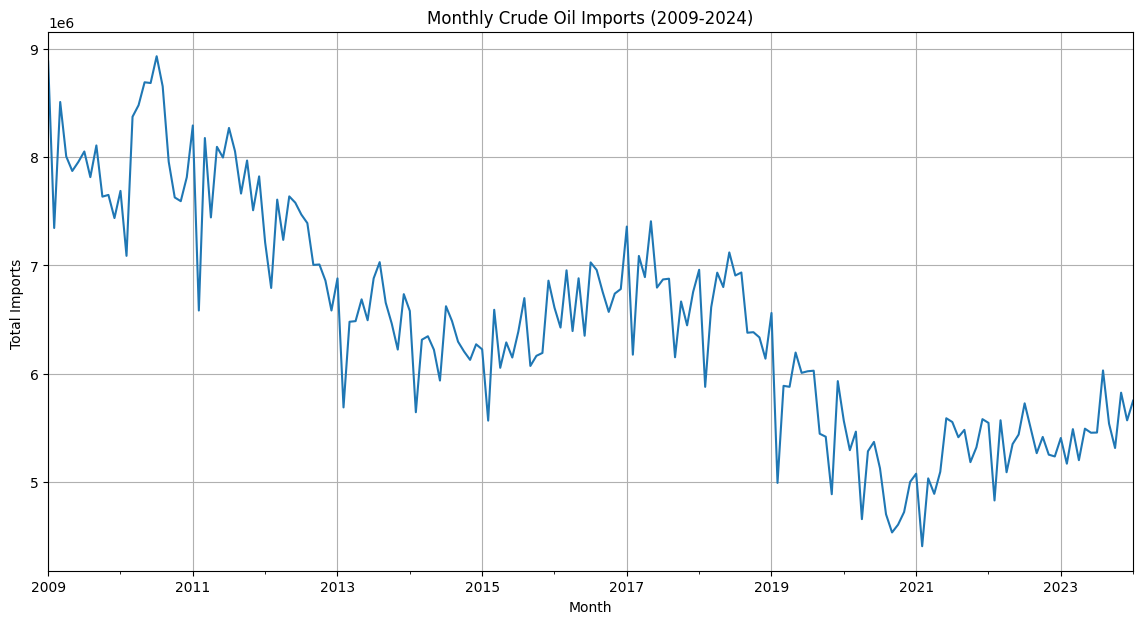

In [ ]:
plt.figure(figsize=(14,7))
monthly_import = df['quantity'].resample('M').sum()
monthly_import.plot(title='Monthly Crude Oil Imports (2009-2024)', ylabel='Total Imports ', xlabel='Month', grid=True)
plt.show()

### Seasonal Trend Analysis

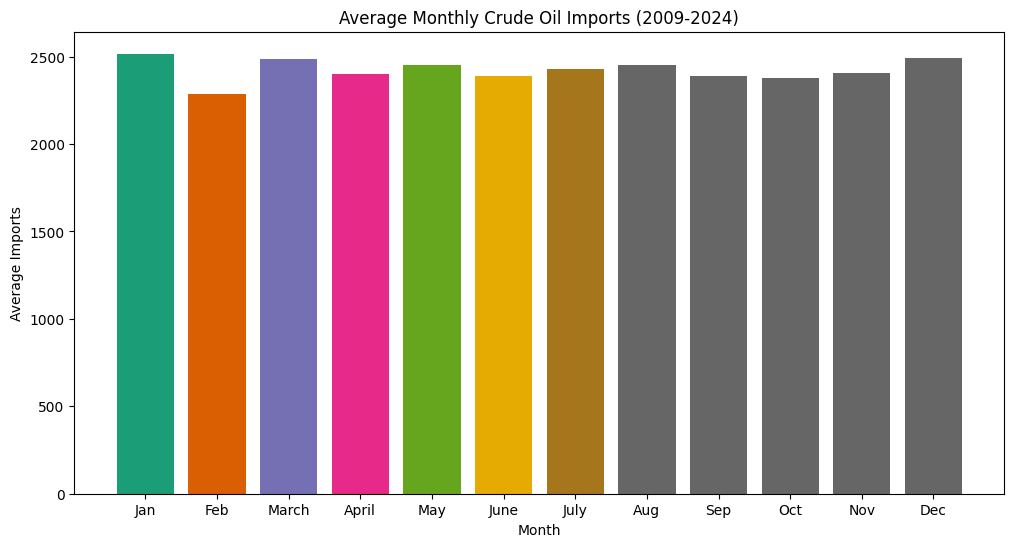

In [ ]:

df['month'] = df.index.month
monthly_mean = df.groupby('month')['quantity'].mean()

months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
colors = plt.cm.Dark2(range(len(monthly_mean)))
plt.bar(months, monthly_mean, color=colors)
plt.title('Average Monthly Crude Oil Imports (2009-2024)')
plt.ylabel('Average Imports')
plt.xlabel('Month')
plt.show()

### Yearly Trends Analysis

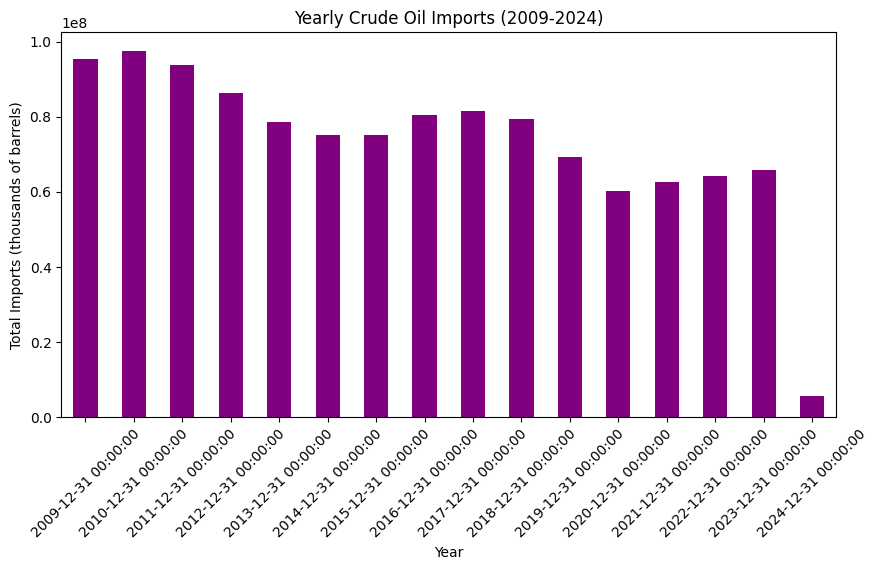

In [ ]:
yearly_imports = df['quantity'].resample('Y').sum()
plt.figure(figsize=(10, 5))
yearly_imports.plot(kind='bar', title='Yearly Crude Oil Imports (2009-2024)', ylabel='Total Imports (thousands of barrels)', xlabel='Year', color='purple')
plt.xticks(rotation=45)
plt.show()

 Trends of crude oil grades over time

<Figure size 1400x700 with 0 Axes>

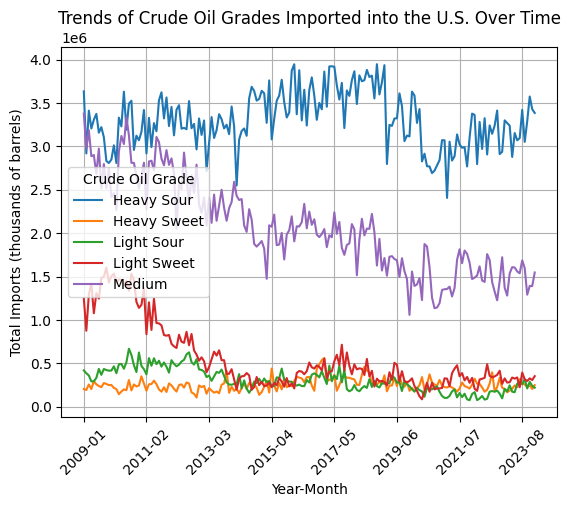

In [ ]:

df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
grade_trends = df.pivot_table(values='quantity', index='year_month', columns='gradeName', aggfunc=np.sum)

plt.figure(figsize=(14, 7))
grade_trends.plot(title='Trends of Crude Oil Grades Imported into the U.S. Over Time', ylabel='Total Imports (thousands of barrels)', xlabel='Year-Month')
plt.legend(title='Crude Oil Grade')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

To handle categorical columns in large dataframe Let's take a sample data of 10000 rows, perform one-hot-encoding to make it understandable for model.
The target variable is Quantity
All other variables are features that can potentially be used to predict the target, quantity.

In [ ]:
# performing one hot encoding on 10000 rows of dataframe and store in the sample data variable
sample_data = pd.get_dummies(df)[:10000]

In [ ]:
# Features
train_data = sample_data.sample(frac=0.8, random_state=0)
# Target variable
test_data = sample_data.drop(train_data.index)

Splitting the training and testing data, set the datatype as floating values

In [ ]:
x_train = train_data.copy().astype(dtype=float)
y_train = train_data.pop('quantity').astype(dtype=float)
x_test = test_data.copy().astype(dtype=float)
y_test = test_data.pop('quantity').astype(dtype=float)

Training Multilayer Perceptron Neural Network to Predict the Quantity of Crude Oil Production:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

model = Sequential(
    layers=[
      normalizer,
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1)
    ]
)

### Evaluate the model on the test data:


In [ ]:

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split = 0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]
)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 2247.5740 - val_loss: 2112.9663
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1819.0072 - val_loss: 1855.7102
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 1652.0498 - val_loss: 1712.4392
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 1515.8419 - val_loss: 1566.7867
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 1358.0024 - val_loss: 1380.8224
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 1150.5852 - val_loss: 1114.7181
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 860.7896 - val_loss: 763.7917
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 524.8835 - val_loss: 458.6463
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 332.6116 - val_loss: 350.2585
Epoch 10/100
200/200 [=====================

Prediction Accuracy:

In [ ]:
result = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


### **Potential Use Cases:**
This data can be used for various purposes, including:

**Analyzing U.S. crude oil import patterns:** The data can help identify the major countries exporting crude oil to the United States, the most common grades of crude oil imported, and the primary ports of entry.

**Investigating the impact of crude oil imports on the U.S. economy:** By combining this data with other economic indicators, researchers can explore the relationship between crude oil imports and various aspects of the U.S. economy, such as GDP, employment, and inflation.

**Optimizing supply chain management:** Oil companies and refineries can use this data to better understand their supply chains and make informed decisions about sourcing, transportation, and storage of crude oil.

**Forecasting future trends:** By analyzing historical import data, researchers can develop models to forecast future trends in U.S. crude oil imports, which can help inform policy decisions and business strategies.

**Environmental impact assessment:** The data can be used to estimate the environmental impact of crude oil imports, such as the carbon footprint associated with transportation and refining processes.